First run with variable vertical diffusivity
---------------------------------------

Plots and comparison between run13 of 8Tr_BarkleyHyd_GMREDI and run01 of 3DKzDiff

In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 

In [3]:
filename1a='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/state.0000000000.glob.nc'
StateOut = Dataset(filename1a)


filename2a='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/grid.glob.nc'
GridOut = Dataset(filename2a)


filename3a='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/ptracers.0000000000.glob.nc'
PtracersOut = Dataset(filename3a)


filename1b='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz/run01/stateGlob.nc'
StateOut = Dataset(filename1b)


filename2b='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz/run01/gridGlob.nc'
GridOut = Dataset(filename2b)


filename3b='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz/run01/ptracersGlob.nc'
PtracersOut = Dataset(filename3b)


In [4]:
# General input

nx = 360
ny = 360
nz = 90

nt = 19 # t dimension size 

z = StateOut.variables['Z']
#print(z[10])
Time = StateOut.variables['T']
#print(Time[:])

xc = rout.getField(filename2a, 'XC') # x coords tracer cells

yc = rout.getField(filename2a, 'YC') # y coords tracer cells

bathy = rout.getField(filename2a, 'Depth')

MaskC = rout.getMask(filename2a,'HFacC')

In [5]:
zlev = 15             # level 34 corresponds to  162.5m , near shelf break

timesc = np.arange(0,len(Time),2)   # These correspond to each day


In [6]:
TempB = rout.getField(filename1b, 'Temp')

#temp0B = np.ma.masked_values(TempB, 0)

TempA = rout.getField(filename1a, 'Temp')

#temp0A = np.ma.masked_values(TempA, 0)


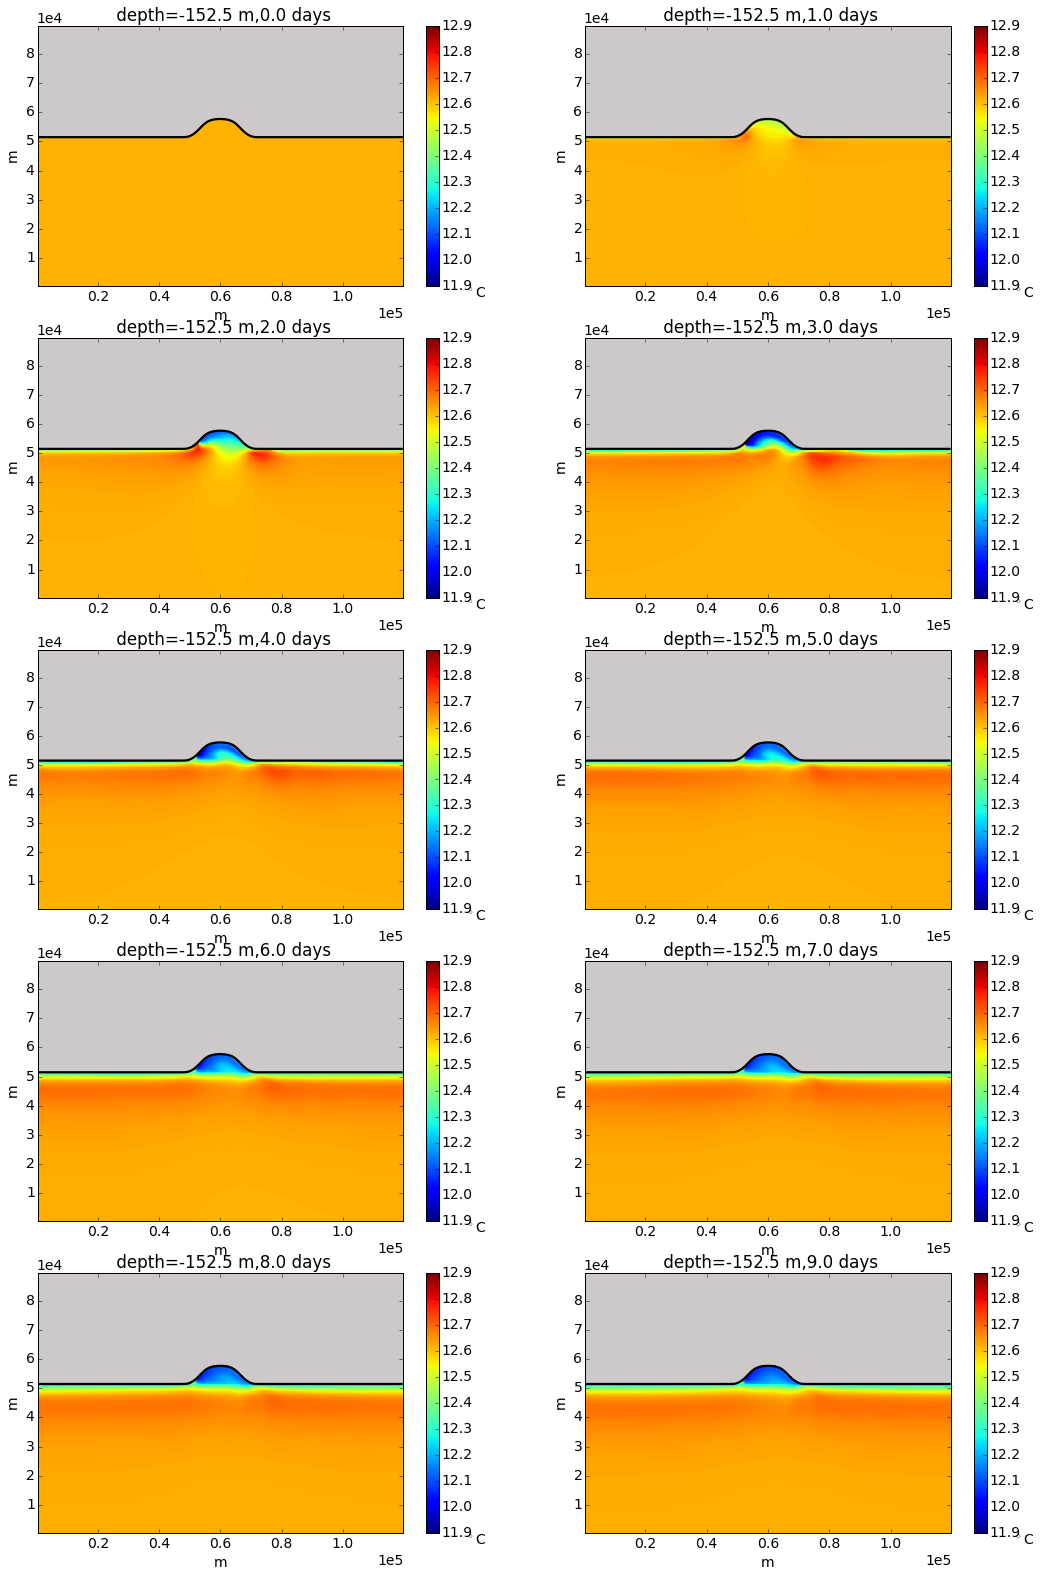

In [7]:
####  PLOT ####
zlev=30
plt.rcParams.update({'font.size':14})

kk=1

fig45=plt.figure(figsize=(18,27))

for tt in range(0,19,2) :
        
        ### Temperature run01
        plt.subplot(5,2,kk)
        
        ax = plt.gca()
        CS = plt.contour(xc,yc,bathy,[150],colors='k',linewidths=[2.25] )
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        TempMaskB=np.ma.array(TempB[tt,zlev,:,:],mask=MaskC[zlev,:,:])
        
        plt.pcolor(xc,yc,TempMaskB)
        pl.clim([11.9,12.9])
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
        plt.xlabel('m')
        plt.ylabel('m')
        
        cb = plt.colorbar()
        
        cb.set_label(r'$^{\circ}$C',position=(1, 0),rotation=0)
       
        plt.title(" depth=%1.1f m,%1.1f days " % (z[zlev],tt/2.))
        
        kk=kk+1
        

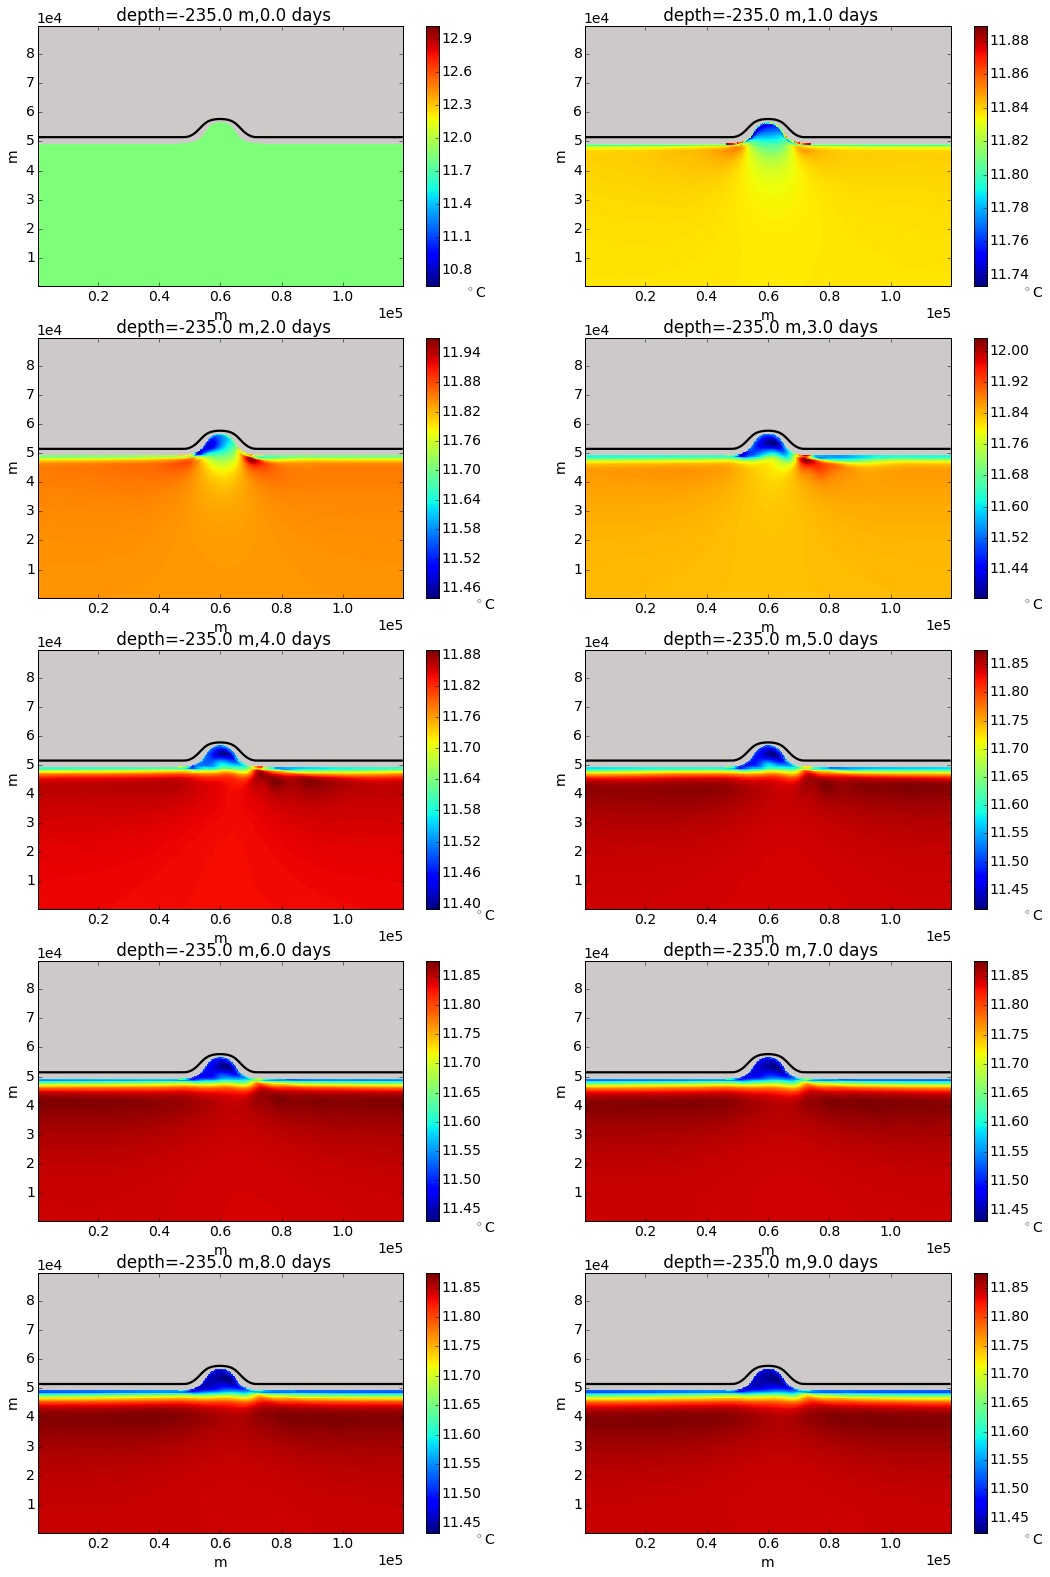

In [8]:
####  PLOT ####
zlev=40
plt.rcParams.update({'font.size':14})

kk=1

fig45=plt.figure(figsize=(18,27))

for tt in range(0,19,2) :
        
        ### Temperature run01
        plt.subplot(5,2,kk)
        
        ax = plt.gca()
        CS = plt.contour(xc,yc,bathy,[150],colors='k',linewidths=[2.25] )
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        TempMaskB=np.ma.array(TempB[tt,zlev,:,:],mask=MaskC[zlev,:,:])
        
        plt.pcolor(xc,yc,TempMaskB)
        #pl.clim([10,11])
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
        plt.xlabel('m')
        plt.ylabel('m')
        
        cb = plt.colorbar()
        
        cb.set_label(r'$^{\circ}$C',position=(1, 0),rotation=0)
       
        plt.title(" depth=%1.1f m,%1.1f days " % (z[zlev],tt/2.))
        
        kk=kk+1
        

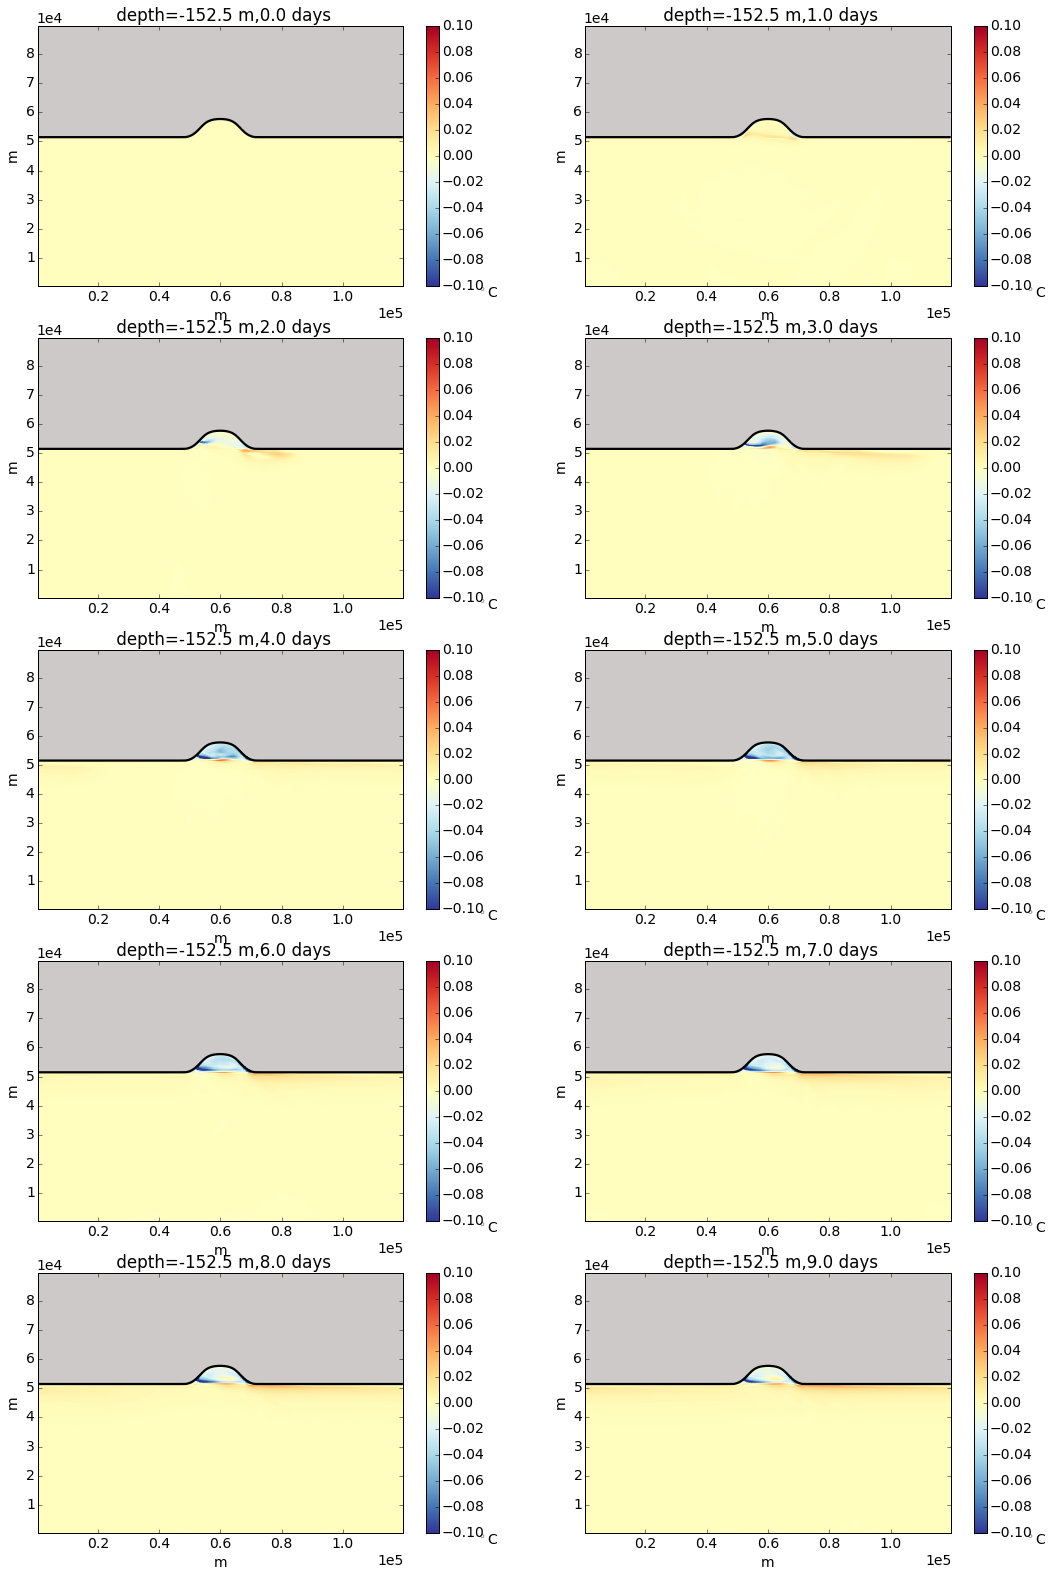

In [37]:
####  PLOT ANOMALY run13-run3DKzDiff####
zlev=30
plt.rcParams.update({'font.size':14})

kk=1

fig45=plt.figure(figsize=(18,27))

for tt in range(0,19,2) :
        
        ### Temperature run01
        plt.subplot(5,2,kk)
        
        ax = plt.gca()
        CS = plt.contour(xc,yc,bathy,[150],colors='k',linewidths=[2.25] )
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        TempMaskB=np.ma.array(TempB[tt,zlev,:,:],mask=MaskC[zlev,:,:])
        TempMaskA=np.ma.array(TempA[tt,zlev,:,:],mask=MaskC[zlev,:,:])
        
        plt.pcolor(xc,yc,TempMaskA-TempMaskB,vmin=-0.1,vmax=0.1,cmap='RdYlBu_r')
        #pl.clim([11.9,12.9])
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
        plt.xlabel('m')
        plt.ylabel('m')
        
        cb = plt.colorbar()
        
        cb.set_label(r'$^{\circ}$C',position=(1, 0),rotation=0)
       
        plt.title(" depth=%1.1f m,%1.1f days " % (z[zlev],tt/2.))
        
        kk=kk+1

52100.0


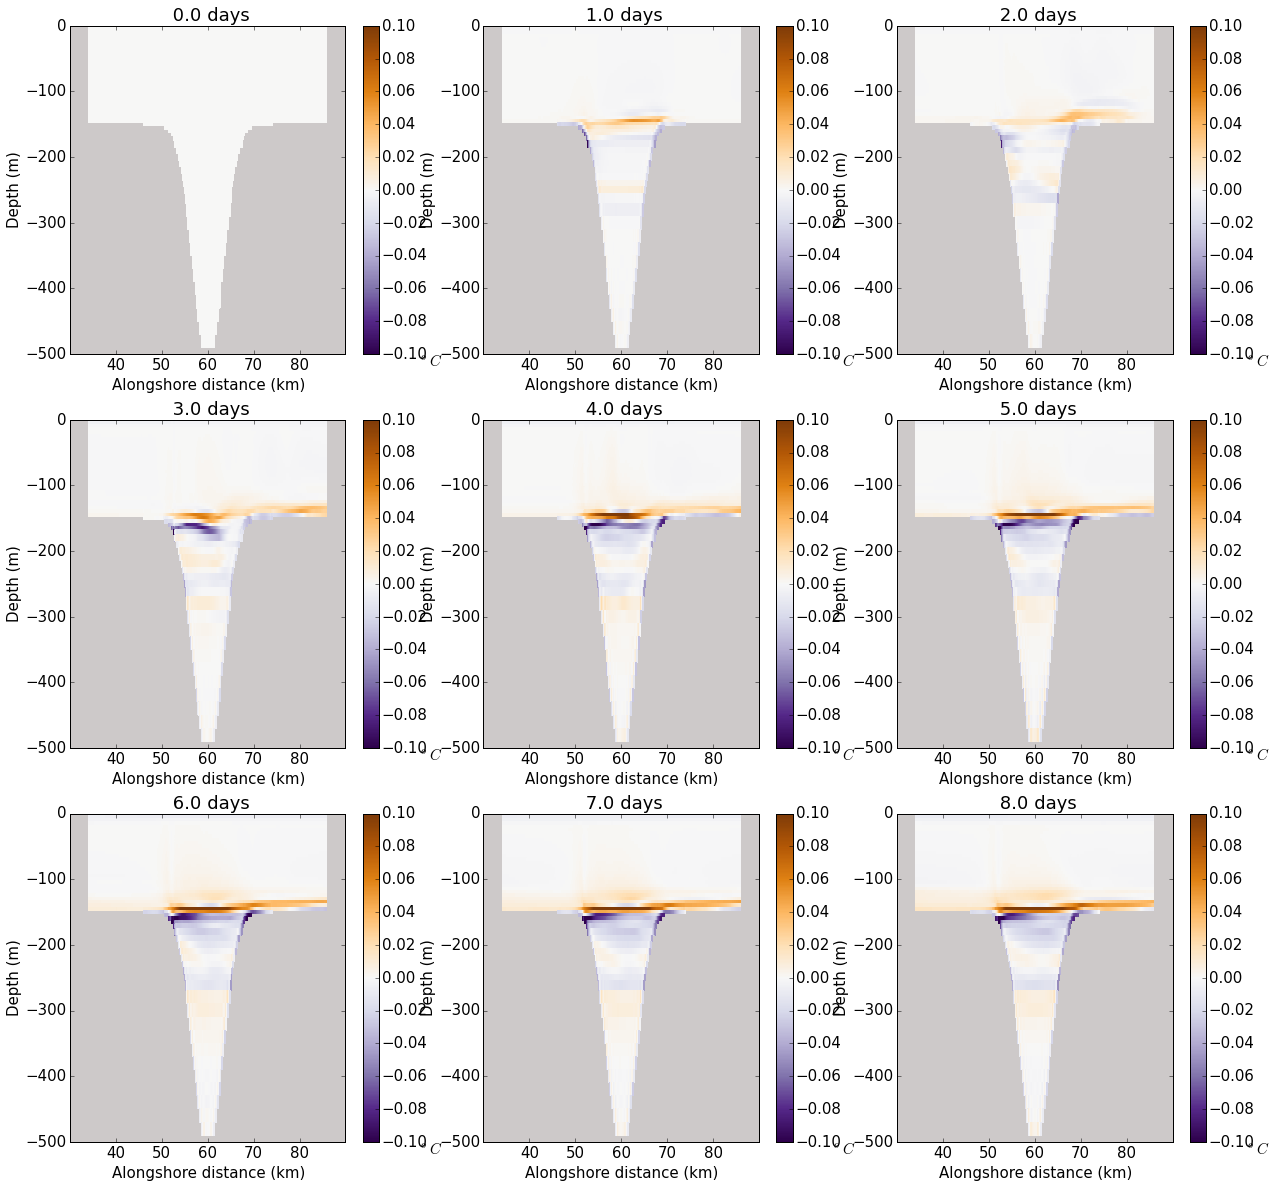

In [35]:
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in range(0,18,2) :
        
        ### Upstream speed 
        
        plt.subplot(3,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        TempMaskB=np.ma.array(TempB[tt,:,:,:],mask=MaskC[:,:,:])
        TempMaskA=np.ma.array(TempA[tt,:,:,:],mask=MaskC[:,:,:])
        
        #Trmask=np.ma.array(temp[tt,:,:,:],mask=MASKhFacC[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        #levels=np.arange(9,14.4,0.2)
        CS=plt.pcolor(xc[200,50:-50],z[:-35],TempMaskA[:-35,200,50:-50]-TempMaskB[:-35,200,50:-50],vmin=-0.1, 
                      vmax=0.1,cmap='PuOr_r')
        cb = plt.colorbar()
       
        plt.ylabel('Depth (m)')
        plt.xlabel('Alongshore distance (km)')
        cb.set_label('$^oC$', position=(1, 0),rotation=0)
        labels = [40, 50, 60, 70, 80]
        plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
       
            
        kk=kk+1
print(yc[200,0]) 


54100.0


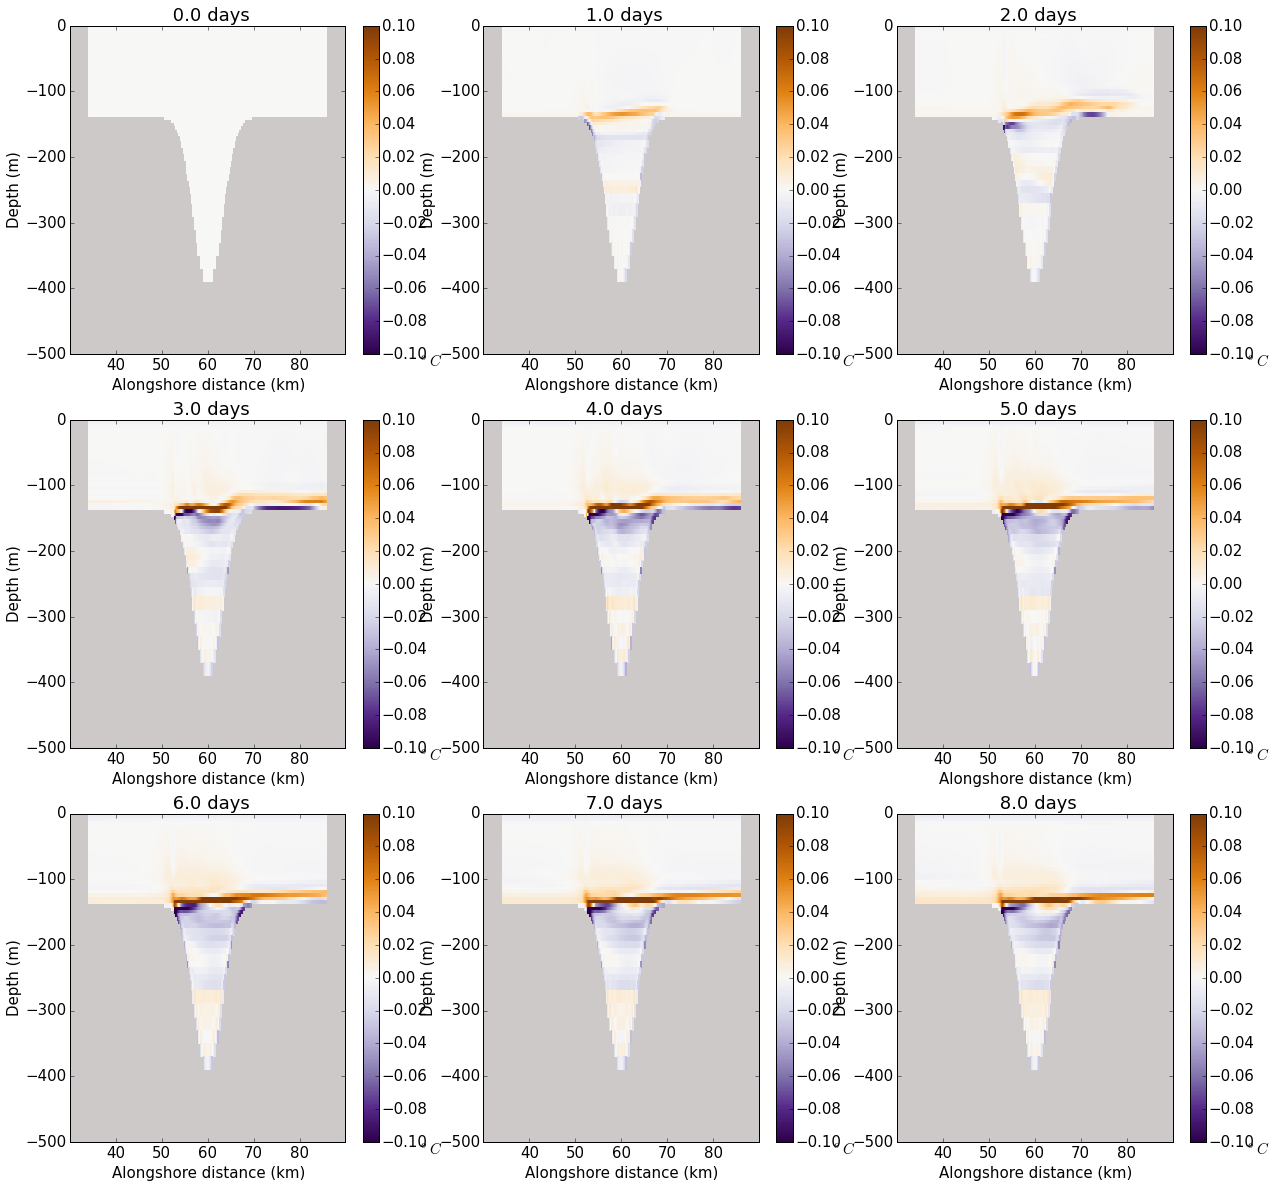

In [32]:
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in range(0,18,2) :
        
        ### Upstream speed 
        
        plt.subplot(3,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        TempMaskB=np.ma.array(TempB[tt,:,:,:],mask=MaskC[:,:,:])
        TempMaskA=np.ma.array(TempA[tt,:,:,:],mask=MaskC[:,:,:])
        
        #Trmask=np.ma.array(temp[tt,:,:,:],mask=MASKhFacC[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        #levels=np.arange(9,14.4,0.2)
        CS=plt.pcolor(xc[210,50:-50],z[:-35],TempMaskA[:-35,210,50:-50]-TempMaskB[:-35,210,50:-50],vmin=-0.1, vmax=0.1,cmap='PuOr_r')
        cb = plt.colorbar()
       
        plt.ylabel('Depth (m)')
        plt.xlabel('Alongshore distance (km)')
        cb.set_label('$^oC$', position=(1, 0),rotation=0)
        labels = [40, 50, 60, 70, 80]
        plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
       
            
        kk=kk+1
print(yc[210,0]) 


60100.0


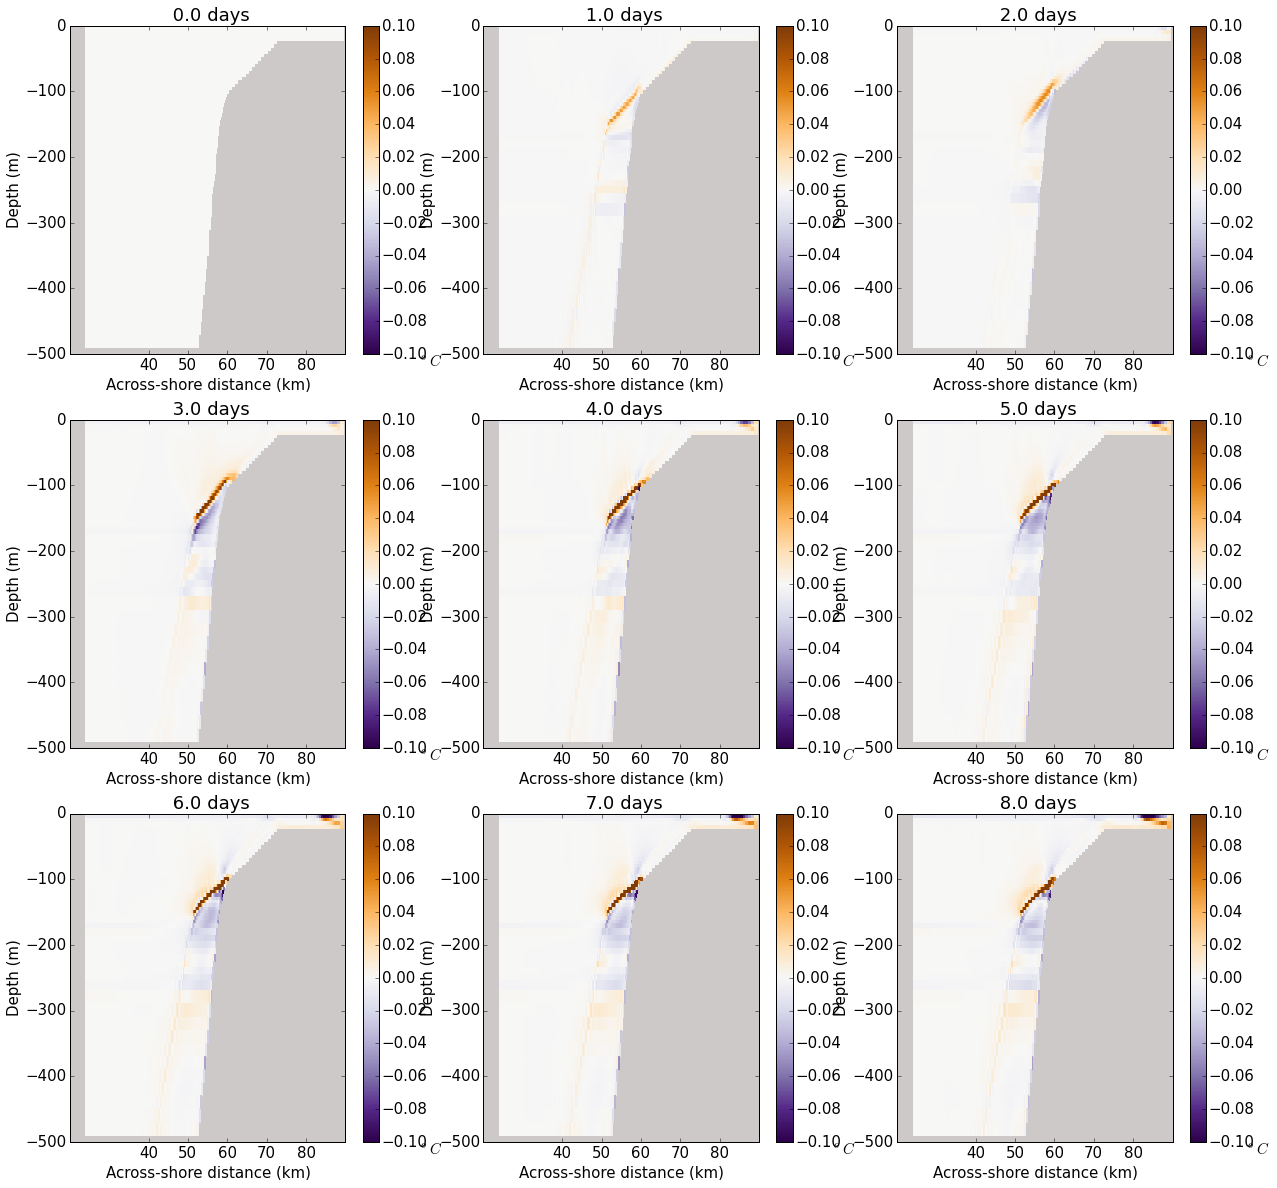

In [34]:
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in range(0,18,2) :
        
        ### Upstream speed 
        
        plt.subplot(3,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        TempMaskB=np.ma.array(TempB[tt,:,:,:],mask=MaskC[:,:,:])
        TempMaskA=np.ma.array(TempA[tt,:,:,:],mask=MaskC[:,:,:])
        
        #Trmask=np.ma.array(temp[tt,:,:,:],mask=MASKhFacC[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        #levels=np.arange(9,14.4,0.2)
        CS=plt.pcolor(yc[60:,180],z[:-35],TempMaskA[:-35,60:,180]-TempMaskB[:-35,60:,180],vmin=-0.1,vmax=0.1,cmap='PuOr_r')
        cb = plt.colorbar()
       
        plt.ylabel('Depth (m)')
        plt.xlabel('Across-shore distance (km)')
        cb.set_label('$^oC$', position=(1, 0),rotation=0)
        labels = [40, 50, 60, 70, 80]
        plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
       
            
        kk=kk+1
print(xc[0,180]) 


60100.0


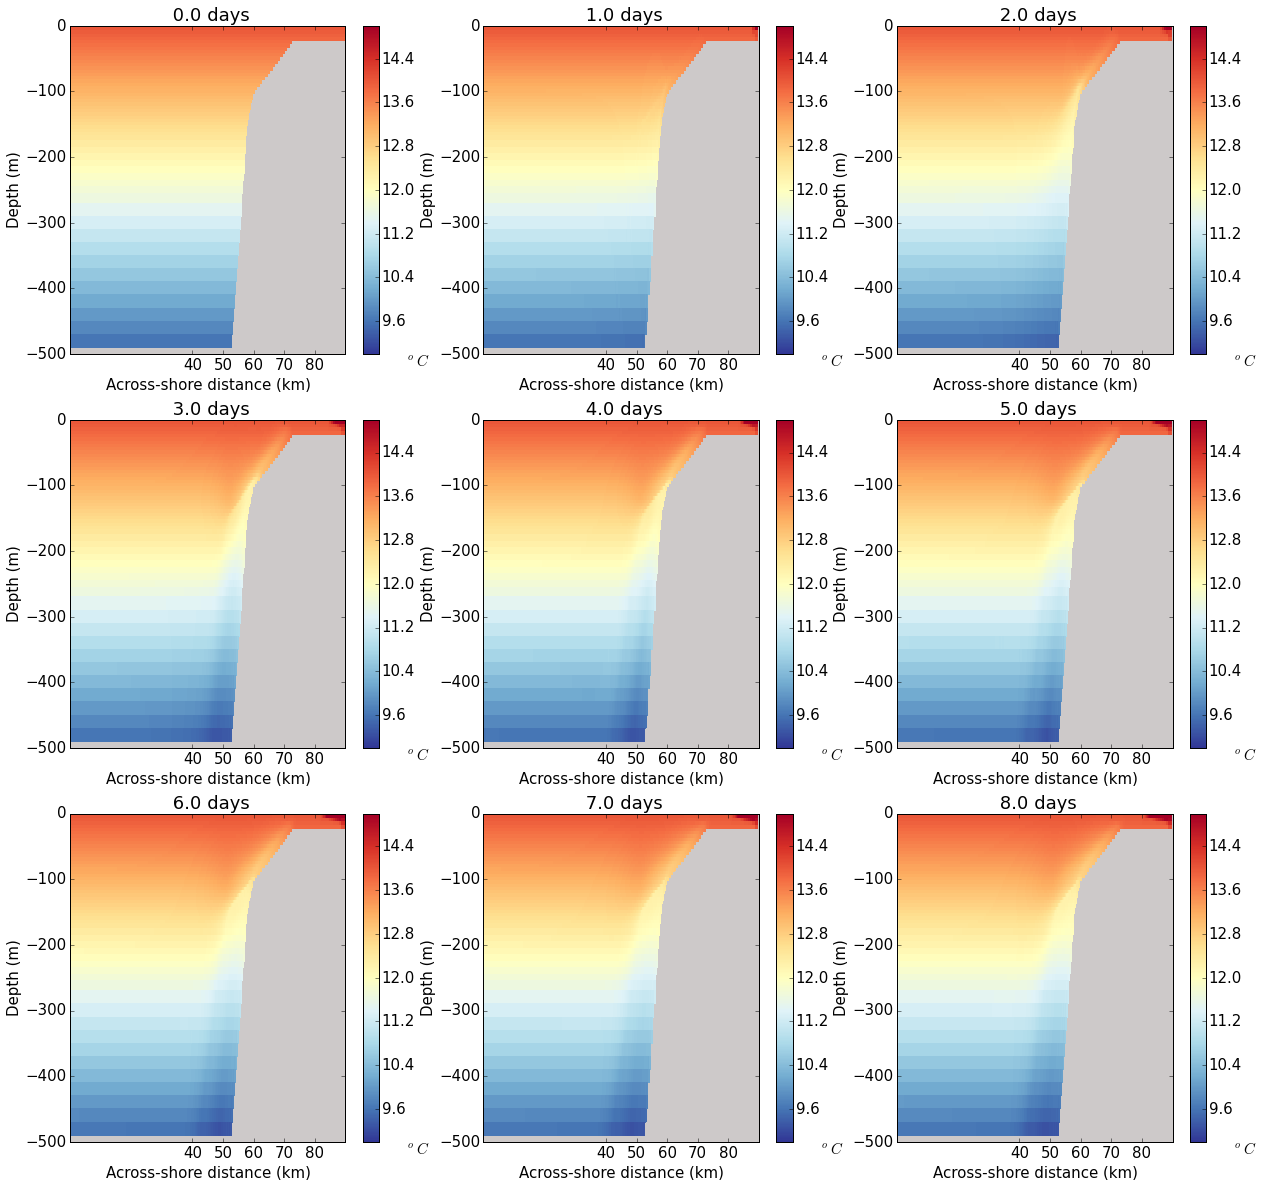

In [38]:
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in range(0,18,2) :
        
        ### Upstream speed 
        
        plt.subplot(3,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        TempMaskB=np.ma.array(TempB[tt,:,:,:],mask=MaskC[:,:,:])
        
        #Trmask=np.ma.array(temp[tt,:,:,:],mask=MASKhFacC[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        #levels=np.arange(9,14.4,0.2)
        CS=plt.pcolor(yc[:,180],z[:-35],TempMaskB[:-35,:,180],cmap='RdYlBu_r')
        cb = plt.colorbar()
        plt.clim([9,15])
        plt.ylabel('Depth (m)')
        plt.xlabel('Across-shore distance (km)')
        cb.set_label('$^oC$', position=(1, 0),rotation=0)
        labels = [40, 50, 60, 70, 80]
        plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
       
            
        kk=kk+1
print(xc[0,180]) 
